In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytesseract
import cv2

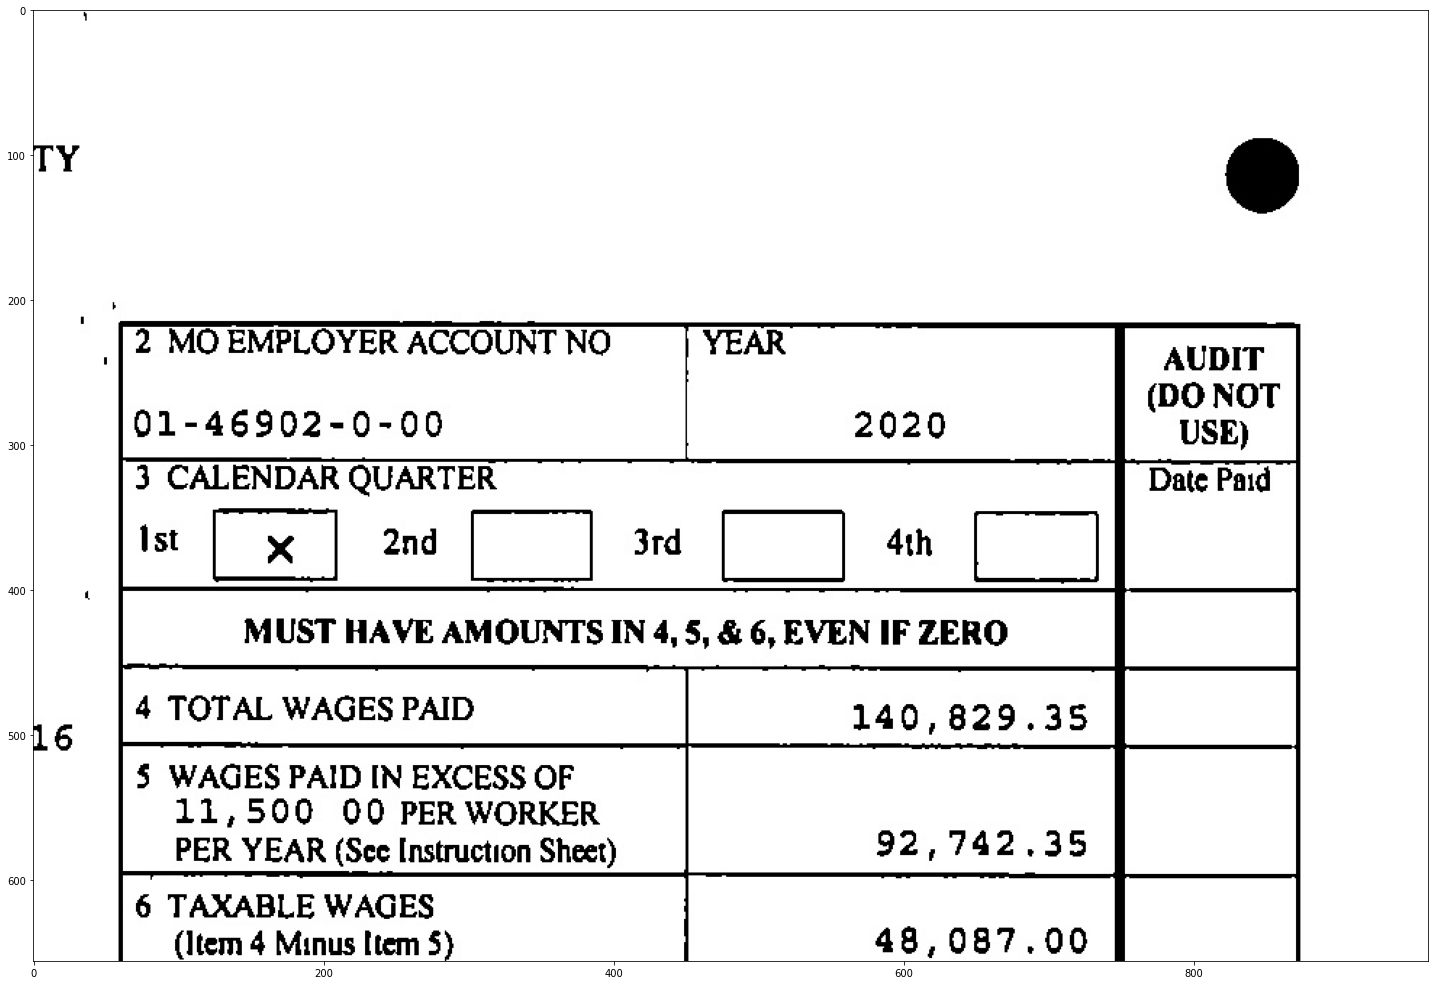

In [2]:
im = cv2.imread('/home/vimalkumar.s/Documents/python_new/top_right.jpg')
plt.figure(figsize=(25,25))
plt.imshow(im)

In [9]:
text = pytesseract.image_to_string(im,  config = ('--psm 13 -c tessedit_char_whitelist=0123456789'))
print(text)

In [99]:
im = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0152363000.tif')
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(im,  config = config)
print(text)


'

MISSOURI DIV OF EMPLOYMENT SECURITY

@

UNEMPLOYMENT INSURANCE TAX

573-751-1995

2 MO EMPLOYER ACCOUNT NO

YEAR

QUARTERLY CONTRIBUTION

AUDIT

AND WAGE REPORT

(DO NOT

01-52363 “0-90

2020

USE)

File online at uinteract. Jabormo.goyv

EAU4

3

CALENDAR QUARTER

Date Paid

1

EMPLOYER NAME AND ADDRESS

Ist

2nd

4th [|

DR. MICHAEL R. PENNEY,

OPTOMETRIST, P.C

MUST HAVE AMOUNTS IN 4, 5, & 6, EVEN IF ZERO

3061 NORTH WESTWOOD

POPLAR BLUFF, MO 63901

4 TOTAL WAGES PAID

5 WAGES PAID IN EXCESS OF

11500. O0OPER WORKER

PER YEAR (See Instruction Sheet)

8500.00

43387.31

7 TAXES DUE (Multiply Item 6

14 FEDERALIONUMBER 43-1591757

by Your Rate)

0.000000

if mailing, return this page with remittance to

8

INTEREST ASSESSMENT DUE

TO FEDERAL ADVANCES

{__Dlvision of Employment Security

-

-

\

9

INTEREST CHARGES OF

ft

PO. Box 888

Jefferson City, MO 65102-0888

\

PER MONTH IF

Make check payable to Division of Employment Security

PAID AFTER

|

or pay online at

‘145 THIS R

In [30]:
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0100931000.tif')
width = image.shape[1]
height = image.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = image[y:y+h, x:x+w]
im = crop.copy()
ret,thresh2 = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN)
plt.imshow(opening)
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(opening,  config = config)
print(text)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'morphologyEx'
> Overload resolution failed:
>  - morphologyEx() missing required argument 'kernel' (pos 3)
>  - morphologyEx() missing required argument 'kernel' (pos 3)


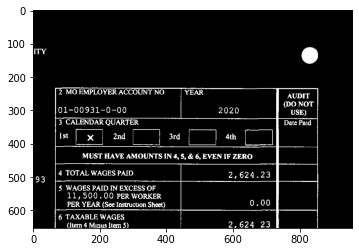

In [34]:
ret,thresh2 = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2)

In [48]:
imm = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0103181000.tif')
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(imm,  config = config)
print(text)


MISSOURI DIV OF EMPLOYMENT SECURITY

@

UNEMPLOYMENT INSURANCE TAX

@

573-751-1995

QUARTERLY CONTRIBUTION

2 MO EMPLOYER ACCOUNT NO

YEAR

AUDIT

AND WAGE REPORT

(DO NOT

01-03181-0-00

2020

USE)

File online at uinteract. labor mo gov

EAU4

3 CALENDAR QUARTER

Date Paid

1

EMPLOYER NAME AND ADDRESS

Ist

2nd

3rd| X

4th

BAUER OIL COMPANY

MUST HAVE AMOUNTS IN 4, 5, & 6, EVEN IF ZERO

9874 GRANTVIEW FOREST DR.

ST. LOUIS, MO 63123

TOTAL WAGES PAID

64094,24

WAGES PAID IN EXCESS OF

11500. O0OPER WORKER

PER YEAR (See Instruction Sheet)

62241.66

TAXABLE WAGES

(Item 4 Minus Item 5)

1852.58

TAXES DUE (Multiply Item 6

14 FEDERAL IDNUMBER 43-1207380

by Your Rate)

0.00

0.000000

If mailing, return this page with remittance to

INTEREST ASSESSMENT DUE

Division of Employment Security

TO FEDERAL ADVANCES

INTEREST CHARGES OF

PO Box 888

Jefferson City, MO 65102-0888

PER MONTH IF

Make check payable to Division of Employment Security

PAID AFTER

/

f

or pay online at uin

@

2 MO EMPLOYER ACCOUNT NO

YEAR

AUDIT

(DO NOT

01-03181-0-00

2020

USE)

3 CALENDAR QUARTER

Date Paid

rst

|

2nd |

|

ar] x |

4th []

MUST HAVE AMOUNTS IN 4, 5, & 6, EVEN IF ZERO

TOTAL WAGES PAID

64094.24

WAGES PAID IN EXCESS OF

11500. O0OPER WORKER

PER YEAR (See Instruction Sheet)

62241.66

TAXYARLE Waces



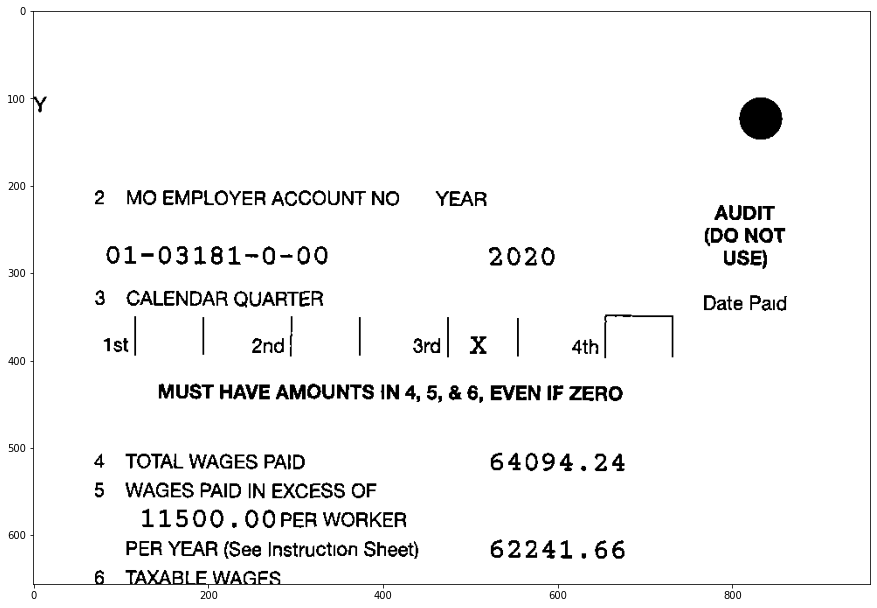

In [70]:
import cv2

image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0103181000.tif')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
#plt.figure(figsize=(15,15))
#plt.imshow(result)

width = result.shape[1]
height = result.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = result[y:y+h, x:x+w]
plt.figure(figsize=(15,15))
plt.imshow(crop)

im = crop.copy()
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(im,  config = config)
print(text)

MISSOURI DIV OF EMPLOYMENT SECURITY

ed

UNEMPLOYMENT INSURANCE TAX

573-751-1995

2

MS EMPLOYER ACCOUNT NO

YEAR

QUARTERLY CONTRIBUTION

AUDIT

AND WAGE REPORT

(DO NOT

01-03181-0-00

2020

USE)

File online at uinteract. labor mo gov

EAU4

3 CALENDAR QUARTER

1

EMPLOYER NAME AND ADDRESS

Ist

2nd

ori] x

BAUER OIL COMPANY

MUST HAVE AMOUNTS IN 4, 5, & 6, EVEN IF ZERO

9874 GRANTVIEW FOREST DR

oT

LOUIS

MO 63123

Scan [ae |

5S WAGES PAID IN EXCESS OF

11500 .00PER WORKER

PER YEAR (See Instruction Sheet)

essence |

| aese.se 58

7 TAXES DUE {Multiply !ltem 6

14 FEDERAL IDNUMBER 43-1207380

by Your Rate)

0.000000

If mailing, return this page with remittance to

Division of Employment Security

ae

PO Box 8&3

INTEREST CHARGES OF

PER MONTH IF

Jefferson City, MO 65102-0888

Make check payable to Division of Employment Security

PAID AFTER

——

or pay online at uinteract.labor mo gov

160 LATE REPORT PENALTY

15 THIS REPORTIS DUEBY 11/02/2020

CHARGES (See Item 15 to the em

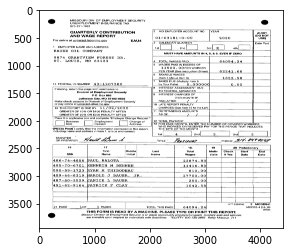

In [69]:
import cv2
source = cv2.imread("/home/vimalkumar.s/Documents/Good Files/0103181000.tif",1)
scaleX = 0.88
scaleY = 0.6
scaleDown = cv2.resize(source, None, fx= scaleX, fy= scaleY, interpolation= cv2.INTER_LINEAR)
scaleUp = cv2.resize(source, None, fx= scaleX*3, fy= scaleY*3, interpolation= cv2.INTER_LINEAR)
crop = source[100:500,500:2000]
#plt.imshow(source)
#plt.imshow(scaleDown)
plt.imshow(scaleUp)
x = scaleUp.copy()
#plt.imshow(crop)
#im = Image.fromarray(scaleUp)
#im.save("zoom1.jpeg")
plt.imshow(x)
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(x,  config = config)
print(text)

Ty

@

— OT ere ee ee ee ee er ET Be

ae

AUDIT

(DO NOT

01-46902-0-0060

2020

USE)

SO ed ee ye 8

S7ththy £ £ELQS

Ist

|

~x<

|

2nd

|

|

3rd

|

|

4th

|

MUST HAVWE AMOUNTS IN 4, 5, & 6, EVEN IF ZERO

TOTAL WAGES PAID

140,829.35

16

-

sara oe TR A ETS FRE OE eee

—— =

11,500 OO PER WORKER

92,742.35

PER YEAR (Sce [Instruction Sheet)

TAXABLE WAGES

(lterm 4 Minus [tem 5}

435,vU50 7? .UYU



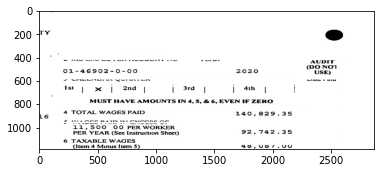

In [89]:
import cv2
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0111575000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

source = result.copy()
scaleX = 0.995
scaleY = 0.6
scaleDown = cv2.resize(source, None, fx= scaleX, fy= scaleY, interpolation= cv2.INTER_LINEAR)
scaleUp = cv2.resize(source, None, fx= scaleX*3, fy= scaleY*3, interpolation= cv2.INTER_LINEAR)
crop = source[100:500,500:2000]
#plt.imshow(source)
#plt.imshow(scaleDown)
plt.imshow(scaleUp)
x = scaleUp.copy()
#plt.imshow(crop)
#im = Image.fromarray(scaleUp)
#im.save("zoom1.jpeg")
plt.imshow(x)
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(x,  config = config)
print(text)

In [96]:
import cv2
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0110680000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
config = ("-l eng --oem 1 --psm 11")
text = pytesseract.image_to_string(im,  config = config)
print(text)

AUDIT

(DO NOT

USE)

3 oe] QUARTER

Date Pard

Ist

[x | [jam [| an [|

MUST HAVE AMOUNTS IN 4, 5, & 6 EVEN IF ZERO

5 WAGES PAID IN EXCESS OF

11,500 60 PER WORKER

PER YEAR (See Instruction Sheet)

P00

6 TAXABLE WAGES

(Item 4 Minus Item 5)

9. 9000.00



In [100]:
import cv2
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0110680000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()

ModuleNotFoundError: No module named 'easyocr'

In [159]:
import cv2
import numpy as np
import easyocr
from PIL import Image

reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0110680000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
r_easy_ocr

Using CPU. Note: This module is much faster with a GPU.


['2 MO EMPLOYER ACCOUNT NO',
 'YEAR',
 'AUDIT',
 '(DO NOT',
 '01-10680-0-00',
 '2020',
 'USE)',
 'CALENDAR QUARTER',
 'Date Paid',
 'Ist',
 'X',
 '2nd',
 '3rd',
 'Ath',
 'MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO',
 'TOTAL WAGES PAID',
 '9, 000 _',
 '5 WAGES PAID IN EXCESS OF',
 '11,500 00',
 'PER WORKER',
 'PER YEAR (See Instruction Shect)',
 '6 TAXABLE WAGES',
 '(ltem 4 Minus Item 5)',
 '9  000 00']

In [122]:
import cv2
import numpy as np
import easyocr
from PIL import Image

reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0121773000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
r_easy_ocr

Using CPU. Note: This module is much faster with a GPU.


['TY',
 '2 MOEMLOYER ACCOUNT NO',
 'YEAR',
 'AUDIT',
 '(DO NOT',
 '01-21773-0-00',
 '2020',
 'USE)',
 'CALENDAR QUARTER',
 'Date Pad',
 'Ist',
 '2nd',
 '3rd',
 '4th',
 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO',
 'TOTAL WAGES PAID',
 '133,706',
 '52',
 '19',
 '5 WAGES PAID IN EXCESS OF',
 '11,500',
 '00 PER WORKER',
 'PER YEAR (See Instruction Sheet)',
 '121,293',
 '10',
 'TAXABLE WAGES',
 '(Item 4 Minus Item 5)',
 '12,413',
 '42']

In [114]:
r_easy_ocr[0]

'TY'

In [115]:
type(r_easy_ocr)

list

In [125]:
numbers = []
for item in r_easy_ocr:
    for subitem in item:
        if(subitem.isdigit()):
            numbers.append(subitem)
print(numbers)

['2', '0', '1', '2', '1', '7', '7', '3', '0', '0', '0', '2', '0', '2', '0', '2', '3', '4', '4', '5', '6', '1', '3', '3', '7', '0', '6', '5', '2', '1', '9', '5', '1', '1', '5', '0', '0', '0', '0', '1', '2', '1', '2', '9', '3', '1', '0', '4', '5', '1', '2', '4', '1', '3', '4', '2']


In [127]:
numbers = []
for item in r_easy_ocr:
    if(item.isdigit()):
        numbers.append(item)
print(numbers)

['2020', '52', '19', '10', '42']


In [132]:
for i in r_easy_ocr:
    if ',' in i:
        print(i)
    if ' ' in i:
        print(i)


2 MOEMLOYER ACCOUNT NO
(DO NOT
CALENDAR QUARTER
Date Pad
MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO
MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO
TOTAL WAGES PAID
133,706
5 WAGES PAID IN EXCESS OF
11,500
00 PER WORKER
PER YEAR (See Instruction Sheet)
121,293
TAXABLE WAGES
(Item 4 Minus Item 5)
12,413


In [149]:
x=[]
for i in r_easy_ocr:
    if ',' in i:
        k=i.replace(',','')
        x.append(k)
print(x)
y=[]
for j in x:
    if (j.isdigit()):
        #print(j)
        #print(type(j))
        y.append(int(j))
print(y)
print(max(y))


['MUST HAVE AMOUNTS IN 45 & 6EVEN IF ZERO', '133706', '11500', '121293', '12413']
133706
<class 'str'>
11500
<class 'str'>
121293
<class 'str'>
12413
<class 'str'>
[133706, 11500, 121293, 12413]
133706


In [162]:
import cv2
import numpy as np
import easyocr
from PIL import Image

reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0129577000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)
x=[]
for i in r_easy_ocr:
    if ',' in i:
        k=i.replace(',','')
        x.append(k)
    if ' ' in i:
        l = i.replace(' ','')
        x.append(l)
print(x)
y=[]
for j in x:
    if (j.isdigit()):
        #print(j)
        #print(type(j))
        y.append(int(j))
print(y)
print('TOTAL WAGES PAID',max(y))


Using CPU. Note: This module is much faster with a GPU.


['Y', '2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '01-29577-0-00', '2020', 'USE)', '3 CALENDAR QUARTER', 'Date Pald', 'Ist', 'X', '2nd', '3rd', 'Ath', 'MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO', '4 TOTAL WAGES PAID', '47,138 . 46', 'WAGES PAID IN EXCESS OF', '11,500 00', 'PER WORKER', 'PER YEAR (Scc Instruction Shcet)', '12,700.00', '6 TAXABLE WAGES', '9 ^', '1 30', 'A F']
['2MOEMPLOYERACCOUNTNO', '(DONOT', '3CALENDARQUARTER', 'DatePald', 'MUST HAVE AMOUNTS IN 45 & 6 EVEN IF ZERO', 'MUSTHAVEAMOUNTSIN4,5,&6EVENIFZERO', '4TOTALWAGESPAID', '47138 . 46', '47,138.46', 'WAGESPAIDINEXCESSOF', '11500 00', '11,50000', 'PERWORKER', 'PERYEAR(SccInstructionShcet)', '12700.00', '6TAXABLEWAGES', '9^', '130', 'AF']
[130]
TOTAL WAGES PAID 130


In [163]:
r_easy_ocr

['Y',
 '2 MO EMPLOYER ACCOUNT NO',
 'YEAR',
 'AUDIT',
 '(DO NOT',
 '01-29577-0-00',
 '2020',
 'USE)',
 '3 CALENDAR QUARTER',
 'Date Pald',
 'Ist',
 'X',
 '2nd',
 '3rd',
 'Ath',
 'MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO',
 '4 TOTAL WAGES PAID',
 '47,138 . 46',
 'WAGES PAID IN EXCESS OF',
 '11,500 00',
 'PER WORKER',
 'PER YEAR (Scc Instruction Shcet)',
 '12,700.00',
 '6 TAXABLE WAGES',
 '9 ^',
 '1 30',
 'A F']

In [158]:
x=[]
for i in r_easy_ocr:
    if ',' in i:
        k=i.replace(',','')
        x.append(k)
        
print(x)


['MUST HAWE AMOUNTS IN 45 & 6EVEN IF ZERO', '45  257', '3 301']


In [196]:
r_easy_ocr

['Y',
 '2 MO EMPLOYER ACCOUNT NO',
 'YEAR',
 'AUDIT',
 '(DO NOT',
 '01-29577-0-00',
 '2020',
 'USE)',
 '3 CALENDAR QUARTER',
 'Date Pald',
 'Ist',
 'X',
 '2nd',
 '3rd',
 'Ath',
 'MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO',
 '4 TOTAL WAGES PAID',
 '47,138 . 46',
 'WAGES PAID IN EXCESS OF',
 '11,500 00',
 'PER WORKER',
 'PER YEAR (Scc Instruction Shcet)',
 '12,700.00',
 '6 TAXABLE WAGES',
 '9 ^',
 '1 30',
 'A F']

In [184]:
x=[]
for i in r_easy_ocr:
    if "," in i:
        print(i)
        k = i.replace(',','')
        x.append(k)
        l = i.replace('.','')
print(k)
print(l)

MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO
47,138 . 46
11,500 00
12,700.00
12700.00
12,70000


In [185]:
print(x)


['MUST HAVE AMOUNTS IN 45 & 6 EVEN IF ZERO', '47138 . 46', '11500 00', '12700.00']


In [189]:
special_chars = [',','.',' ','  ',';', ':', '!', "*"]
z = []
for a in x:
    for b in special_chars:
        if b in a:
            z.append(a)
print(z)
    


['MUST HAVE AMOUNTS IN 45 & 6 EVEN IF ZERO', '47138 . 46', '47138 . 46', '11500 00', '12700.00']


In [195]:
out_list = [''.join(filter(str.isalnum, string)) for string in z]

print(out_list)

y=[]
for i in out_list:
    if (i.isdigit()):
        y.append(i)
print(max(y))        
        

['MUSTHAVEAMOUNTSIN456EVENIFZERO', '4713846', '4713846', '1150000', '1270000']
4713846


In [205]:
special_chars = [',','.',' ','  ',';', ':', '!', "*"]
z = []
for a in r_easy_ocr:
    for b in special_chars:
        if b in a:
            z.append(a)
#print(z)

out_list = [''.join(filter(str.isalnum, string)) for string in z]

#print(out_list)

y=[]
for i in out_list:
    if (i.isdigit()):
        y.append(int(i))
#print(y)
print(max(y)) 
    


4713846


In [201]:
y

['4713846',
 '4713846',
 '4713846',
 '1150000',
 '1150000',
 '1270000',
 '1270000',
 '9',
 '130']

In [203]:
min(y)

'1150000'

In [172]:
special_chars = [',','.',' ',' ',';', ':', '!', "*"]
x=[]
for i in r_easy_ocr:
    if "," in i:
        print(i)
        k = i.replace(',','')
        print(k)
        l = i.replace(' ','')
        print(l)
        x.append(i)
print(x)       
#for j in special_chars:
test_string = ''.join(i for i in x if not i in special_chars)
print(test_string)


['MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO', '47,138 . 46', '11,500 00', '12,700.00']
MUST HAVE AMOUNTS IN 4,5, & 6 EVEN IF ZERO47,138 . 4611,500 0012,700.00


In [252]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/Good Files/0919557000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)
special_chars = [',','.',' ','  ',';', ':', '!', "*"]
z = []
for a in r_easy_ocr:
    for b in special_chars:
        if b in a:
            z.append(a)
#print(z)

out_list = [''.join(filter(str.isalnum, string)) for string in z]

#print(out_list)

y=[]
for i in out_list:
    if (i.isdigit()):
        y.append(int(i))
print(y)
print('TOTAL WAGES PAID',max(y))

Using CPU. Note: This module is much faster with a GPU.


['2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '09-19557-0-00', '2020', 'USE)', 'CALENDAR QUARTER', 'Dale Paid', 'Ist', 'X', '2nd', '3rd', '4th', 'MUST HAVE AMOUNTS IN 4,5,& 6 EVEN IF ZERO', 'TOTAL WAGES PAID', '55, 842 , 83', '5 WAGES PAID IN EXCESS OF', '11,500 00', 'PER WORKER', 'PER YEAR (See Instruction Sheet)', '28 , 860.46', '6 TAXABLE WAGES', '(Item 4 Minus Item 5)', '2698237']
[5584283, 5584283, 1150000, 1150000, 2886046, 2886046, 2886046]
TOTAL WAGES PAID 5584283


In [253]:
y

[5584283, 5584283, 1150000, 1150000, 2886046, 2886046, 2886046]

In [255]:
w = []
for i in y:
    if i == 11500 or i == 115000 or i == 1150000:
        
        m=y.remove(i)
        w.append(m)
print(w)

[None]


In [219]:
pytesseract.image_to_string(image)

'@ MISSOURI DIV OF EMPLOYMENT SECURITY\nUNEMPLOYMENT INSURANCE TAX\n573-751-1995\n\nQUARTERLY CONTRIBUTION 2 MO EMPLOYER ACCOUNT NO YEAR AUDIT\nAND WAGE REPORT (DO NOT\nFile online at uinteract labor mo gov EAU4 09-24894-0-00 2020 USE)\n\n3 CALENDAR QUARTER Date Paid\n\n| EMPLOYER NAME AND ADDRESS Ist 2nd [| 3rd [| 4th {|\n\nRobert Kocurek LLC\n2273 SW Park Ave MUST HAVE AMOUNTS IN 4, 5, & 6, EVEN IF ZERO\n\n \n\n4 TOTAL WAGES PAID 6,900 00\n\n5 WAGES PAID IN EXCESS OF\n11,500 00 PER WORKER\nPER YEAR (See Instruction Sheet)\n\nBlue Springs MO 64015\n\n6 TAXABLE WAGES\n(Item 4 Minus Item 5) 6,000 00\n\n‘\n7 TAXES DUE (Muluply Item 6\nby Your Rate) 2 3760 142 56\n14 FEDERAL [D NUMBER 83-3037825 sg INTEREST ASSESSMENT DUE\nTO FEDERAL ADVANCES\n\nIf mailing, return this page with remittance to\n\n9 INTEREST CHARGES OF\n_ "0. Boa ee R 04/30/2¢ fe\na PAID AFTER\nsciebvaen Emme a |\n\nt\n\nMake check payable to Division of Employment Security (0 LATE REPORT PENALTY\nor pay online at uinteract

In [36]:
import cv2
import numpy as np
import easyocr
from PIL import Image

reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/file samples/100 files/Good Doc/0500998000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)

for i in r_easy_ocr:
    #print(i)
    if i == 'X' or i == 'x':
        #print(r_easy_ocr.index(i))
        c = r_easy_ocr.index(i)-1
        print(r_easy_ocr[c][0])
        

Using CPU. Note: This module is much faster with a GPU.


['TY', 'MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '05-00998-0-00', '2020', 'USE)', 'CALENDAR QUARTER', 'Date Pald', 'Ist', '2nd', '3rd', '4th', 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO', '4 TOTAL WAGES PAID', '41, 835', '86', '41', '5 WAGES PAID IN EXCESS OF', '11,500', '0 PER WORKER', 'PER YEAR (See InstucLion Sheet)', '1,974', '29', '6 TAXABLE WAGES', '(Itcm 4 Minus Item 5)', '39 , 861', '57']


In [28]:
for i in r_easy_ocr:
    #print(i)
    if i == 'X' or i == 'x':
        #print(r_easy_ocr.index(i))
        c = r_easy_ocr.index(i)-1
        print(r_easy_ocr[c][0])
        

3


In [45]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import os

reader = easyocr.Reader(['en'],gpu = False)

path = '/home/vimalkumar.s/Documents/file samples/100 files/test/samples'
for img in os.listdir(path):
    print(img)
    image = cv2.imread(os.path.join(path,img))
    res = image.copy()
    width = res.shape[1]
    height = res.shape[0]
    wi = width * 0.95
    he = height * 0.3
    w = int(wi)
    h = int(he)
    y = 0
    x1 = w * 0.45
    x = int(x1)
    crop = res[y:y+h, x:x+w]
    im = crop.copy()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
    thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    r_easy_ocr=reader.readtext(thresh,detail=0)
    #print(r_easy_ocr)

    for i in r_easy_ocr:
        #print(i)
        if i == 'X' or i == 'x':
            #print(r_easy_ocr.index(i))
            c = r_easy_ocr.index(i)-1
            print(r_easy_ocr[c][0])
        


Using CPU. Note: This module is much faster with a GPU.


0500847001.tif
0109749000.tif
I
0103841000.tif
I
0110331000.tif
I
0503866000.tif
0501500000.tif
I
0501239000.tif
3
0104921000.tif
I
0502465000.tif
I
0497812000.tif
I
0101231000.tif
I
0495949000.tif
I
0105311000.tif
3
0498650000.tif
0502883000.tif
I
0100617000.tif
I
0496106000.tif
3
0499741000.tif
0110432000.tif
I
0110276000.tif
3
0499439000.tif
1
0499639000.tif
0109374000.tif
0100477000.tif
0495950000.tif
I
0102108000.tif
3
0102281000.tif
0495878000.tif
0504111000.tif
0494564000.tif
3
0110228000.tif
J
0103998000.tif
0106842000.tif
J
0101426000.tif
I
0110040000.tif
3
0105901000.tif
0497990000.tif
I
0495921000.tif
D
0495868000.tif
0110309000.tif
3
0102866000.tif
I
0498755000.tif
0496813000.tif
0499887000.tif
3
0500221000.tif
I
0499925000.tif
I
0111158000.tif
I
0102292000.tif
0501668000.tif
0495860000.tif
I
0495469000.tif
I
0104079000.tif
0109010000.tif
I
0102552000.tif
0495599000.tif
I
0497688000.tif
I
0104702000.tif
3
0499335000.tif
0498823000.tif
I
0106830000.tif
J
0109337000.tif
01082

In [54]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import os

reader = easyocr.Reader(['en'],gpu = False)

path = '/home/vimalkumar.s/Documents/file samples/100 files/test/samples'
for img in os.listdir(path):
    print(img)
    image = cv2.imread(os.path.join(path,img))
    result = image.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255,255,255), 5)

    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255,255,255), 5)
    #plt.figure(figsize=(15,15))
    #plt.imshow(result)

    width = result.shape[1]
    height = result.shape[0]
    wi = width * 0.95
    he = height * 0.3
    w = int(wi)
    h = int(he)
    y = 0
    x1 = w * 0.45
    x = int(x1)
    crop = result[y:y+h, x:x+w]
    #plt.figure(figsize=(15,15))
    #plt.imshow(crop)

    im = crop.copy()

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
    thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    r_easy_ocr=reader.readtext(thresh,detail=0)
    #print(r_easy_ocr)

    for i in r_easy_ocr:
            #print(i)
            if i == 'X' or i == 'x':
                #print(r_easy_ocr.index(i))
                c = r_easy_ocr.index(i)-1
                print(r_easy_ocr[c][0])
        


Using CPU. Note: This module is much faster with a GPU.


0500847001.tif
I
0109749000.tif
I
0103841000.tif
I
0110331000.tif
I
0503866000.tif
0501500000.tif
I
0501239000.tif
0104921000.tif
I
0502465000.tif
I
0497812000.tif
I
0101231000.tif
I
0495949000.tif
I
0105311000.tif
3
0498650000.tif
0502883000.tif
I
0100617000.tif
I
0496106000.tif
3
0499741000.tif
I
0110432000.tif
I
0110276000.tif
3
0499439000.tif
0499639000.tif
0109374000.tif
0100477000.tif
0495950000.tif
I
0102108000.tif
3
0102281000.tif
0495878000.tif
0504111000.tif
0494564000.tif
0110228000.tif
0103998000.tif
0106842000.tif
J
0101426000.tif
I
0110040000.tif
3
0105901000.tif
0497990000.tif
4
0495921000.tif
N
0495868000.tif
0110309000.tif
0102866000.tif
I
0498755000.tif
0496813000.tif
0499887000.tif
3
0500221000.tif
I
0499925000.tif
I
0111158000.tif
I
0102292000.tif
0501668000.tif
0495860000.tif
0495469000.tif
I
0104079000.tif
0109010000.tif
I
0102552000.tif
3
0495599000.tif
I
0497688000.tif
I
0104702000.tif
0499335000.tif
I
0498823000.tif
I
0106830000.tif
0109337000.tif
0108220000.ti

In [183]:
reader = easyocr.Reader(['en'],gpu = False)
im = cv2.imread('/home/vimalkumar.s/Documents/python_new/top_right.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)

Using CPU. Note: This module is much faster with a GPU.


['TY', '2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '01-46902-0-00', '2020', 'USE)', 'CALENDAR QUARTER', 'Datc Paid', 'Ist', '2nd', 'Jrd', '4th', 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO', 'TOTAL WAGES PAID', '140 , 829.35', '16', '5 WAGES PAID IN EXCESS OF', '11', '500', 'PER WORKER', 'PER YEAR (Scc [nstruction Sheet)', '92 , 742,35', '6 TAXABLE WAGES', '(Item 4 Minus Itcm 5)', '48 , 087 , 00']


In [47]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import re


reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/file samples/100 files/test/samples/0500847001.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)

for i in r_easy_ocr:
        #print(i)
        if i == 'TOTAL WAGES PAID':
            #print(r_easy_ocr.index(i))
            c = r_easy_ocr.index(i)+1
            c1 = r_easy_ocr[c]
            ans = re.sub("[ ,.#*]", "", c1)
            print('TOTAL WAGES PAID', ans)

Using CPU. Note: This module is much faster with a GPU.


['Y', '2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '(OXYZc', '2020', 'USE)', 'CALENDAR QUARTER', 'Date Poid', 'Ist', '2nd', 'Jrd', '4th', 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO', 'TOTAL WAGES PAJD', '907.54', '5 WAGES PAID IN EXCESS OF', 'PER WORKER', 'PER YEAR (Sea Instruction Sheet)', '0.00', '6 TAXABLE WAGES', '(Item 4 Mnus Itemn 5)', '907,54']


In [32]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import os

reader = easyocr.Reader(['en'],gpu = False)
path = '/home/vimalkumar.s/Documents/file samples/100 files/test/samples'
for img in os.listdir(path):
    image = cv2.imread(os.path.join(path,img))
    res = image.copy()
    width = res.shape[1]
    height = res.shape[0]
    wi = width * 0.95
    he = height * 0.3
    w = int(wi)
    h = int(he)
    y = 0
    x1 = w * 0.45
    x = int(x1)
    crop = res[y:y+h, x:x+w]
    im = crop.copy()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
    thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    r_easy_ocr=reader.readtext(thresh,detail=0)
    #print(r_easy_ocr)
    if 'TOTAL WAGES PAID' not in r_easy_ocr:
        print(img,'TOTAL WAGES PAID',0)
    else:
        for i in r_easy_ocr:
            #print(i)
            if i == 'TOTAL WAGES PAID':
                #print(r_easy_ocr.index(i))
                c = r_easy_ocr.index(i)+1
                c1 = r_easy_ocr[c]
                ans = re.sub("[ ,.#*]", "", c1)
                print(img,'TOTAL WAGES PAID',ans)
         

Using CPU. Note: This module is much faster with a GPU.


0500847001.tif TOTAL WAGES PAID 0
0109749000.tif TOTAL WAGES PAID 43163
0103841000.tif TOTAL WAGES PAID 0
0110331000.tif TOTAL WAGES PAID 0
0503866000.tif TOTAL WAGES PAID 0
0501500000.tif TOTAL WAGES PAID 0
0501239000.tif TOTAL WAGES PAID 42034488
0104921000.tif TOTAL WAGES PAID 25642596
0502465000.tif TOTAL WAGES PAID 13321
0497812000.tif TOTAL WAGES PAID 3000000
0101231000.tif TOTAL WAGES PAID 0
0495949000.tif TOTAL WAGES PAID 0
0105311000.tif TOTAL WAGES PAID 0
0498650000.tif TOTAL WAGES PAID 0
0502883000.tif TOTAL WAGES PAID 0
0100617000.tif TOTAL WAGES PAID 0
0496106000.tif TOTAL WAGES PAID 19035118
0499741000.tif TOTAL WAGES PAID 0
0110432000.tif TOTAL WAGES PAID 778800
0110276000.tif TOTAL WAGES PAID 0
0499439000.tif TOTAL WAGES PAID 0
0499639000.tif TOTAL WAGES PAID 128544
0109374000.tif TOTAL WAGES PAID 0
0100477000.tif TOTAL WAGES PAID 33935047
0495950000.tif TOTAL WAGES PAID 0
0102108000.tif TOTAL WAGES PAID 0
0102281000.tif TOTAL WAGES PAID 0
0495878000.tif TOTAL WAGES PAI

In [34]:
from autocorrect import Speller

spell = Speller(lang='en')

In [36]:
spell('pajd')

'paid'

In [39]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/home/vimalkumar.s/Documents/python_new/cde_venv/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [40]:
str1 = 'Vimal Kumar'
str2 = 'vimal kumar'

In [41]:
fuzz.ratio(str1,str2)

82

In [48]:
word = 'TOTAL WAGES PAID'

In [49]:
print(r_easy_ocr)

['Y', '2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '(OXYZc', '2020', 'USE)', 'CALENDAR QUARTER', 'Date Poid', 'Ist', '2nd', 'Jrd', '4th', 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO', 'TOTAL WAGES PAJD', '907.54', '5 WAGES PAID IN EXCESS OF', 'PER WORKER', 'PER YEAR (Sea Instruction Sheet)', '0.00', '6 TAXABLE WAGES', '(Item 4 Mnus Itemn 5)', '907,54']


In [51]:
for w in r_easy_ocr:
    c = fuzz.ratio(word,w)
    if c > 85:
        print(c)

94


In [58]:
for w in r_easy_ocr:
    if fuzz.ratio(word,w) > 85:
        print(w)
        print(r_easy_ocr.index(w))
        a = r_easy_ocr.index(w) + 1
        c1 = r_easy_ocr[a]
        print(c1)
        ans = re.sub("[ ,.#*]", "", c1)
        print(ans)

TOTAL WAGES PAJD
15
907.54
90754


In [112]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import re


reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/file samples/100 files/test/samples/0500847001.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)
word = 'TOTAL WAGES PAID'
for w in r_easy_ocr:
    if fuzz.ratio(word,w) > 85:
        print(w)
        print(r_easy_ocr.index(w))
        a = r_easy_ocr.index(w) + 1
        c1 = r_easy_ocr[a]
        print(c1)
        ans = re.sub("[ ,.#*!@$%^&()|\''"":;]", "", c1)
        print(ans)
        

Using CPU. Note: This module is much faster with a GPU.


['Y', '2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '(OXYZc', '2020', 'USE)', 'CALENDAR QUARTER', 'Date Poid', 'Ist', '2nd', 'Jrd', '4th', 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO', 'TOTAL WAGES PAJD', '907.54', '5 WAGES PAID IN EXCESS OF', 'PER WORKER', 'PER YEAR (Sea Instruction Sheet)', '0.00', '6 TAXABLE WAGES', '(Item 4 Mnus Itemn 5)', '907,54']
TOTAL WAGES PAJD
15
907.54
90754


In [114]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import os

reader = easyocr.Reader(['en'],gpu = False)
path = '/home/vimalkumar.s/Documents/file samples/100 files/test/samples'
for img in os.listdir(path):
    image = cv2.imread(os.path.join(path,img))
    res = image.copy()
    width = res.shape[1]
    height = res.shape[0]
    wi = width * 0.95
    he = height * 0.3
    w = int(wi)
    h = int(he)
    y = 0
    x1 = w * 0.45
    x = int(x1)
    crop = res[y:y+h, x:x+w]
    im = crop.copy()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
    thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    r_easy_ocr=reader.readtext(thresh,detail=0)
    #print(r_easy_ocr)
    
    word = 'TOTAL WAGES PAID'
    for w in r_easy_ocr:
        if fuzz.ratio(word,w) > 85:
            #print(w)
            index_1 = r_easy_ocr.index(w) + 1
            #print(index_1)      
            text_1 = r_easy_ocr[index_1]
            #print(text_1)
            num_1 = re.sub("[ ,.#*!@$%^&()|\''"":;]", "", text_1)
            #print(num_1)
            index_2 = index_1 + 1
            #print(index_2)
            check_num = r_easy_ocr[index_2]
            #print(check_num)
            if check_num.isdigit():
                join = "".join([num_1, check_num])
                print(img, 'TOTAL WAGES PAID' , join)
            else:
                print(img, 'TOTAL WAGES PAID' , num_1)
    
         

Using CPU. Note: This module is much faster with a GPU.


0500847001.tif TOTAL WAGES PAID 90754
0109749000.tif TOTAL WAGES PAID 4316357
0103841000.tif TOTAL WAGES PAID 15054298
0110331000.tif TOTAL WAGES PAID 5770577
0503866000.tif TOTAL WAGES PAID 11421015
0501500000.tif TOTAL WAGES PAID 1056000
0501239000.tif TOTAL WAGES PAID 42034488
0104921000.tif TOTAL WAGES PAID 25642596
0502465000.tif TOTAL WAGES PAID 1332100
0497812000.tif TOTAL WAGES PAID 3000000
0101231000.tif TOTAL WAGES PAID 99454487
0495949000.tif TOTAL WAGES PAID 891000
0105311000.tif TOTAL WAGES PAID 34600
0498650000.tif TOTAL WAGES PAID 6019256
0502883000.tif TOTAL WAGES PAID 323990
0100617000.tif TOTAL WAGES PAID 492Lba82
0496106000.tif TOTAL WAGES PAID 19035118
0499741000.tif TOTAL WAGES PAID 450000
0110432000.tif TOTAL WAGES PAID 778800
0110276000.tif TOTAL WAGES PAID 27526110
0499439000.tif TOTAL WAGES PAID 169438
0499639000.tif TOTAL WAGES PAID 12854493
0109374000.tif TOTAL WAGES PAID 23Le
0100477000.tif TOTAL WAGES PAID 33935047
0495950000.tif TOTAL WAGES PAID 220899
010

In [123]:
import cv2
import numpy as np
import easyocr
from PIL import Image
import re


reader = easyocr.Reader(['en'],gpu = False)
image = cv2.imread('/home/vimalkumar.s/Documents/file samples/100 files/test/samples/0496350000.tif')
res = image.copy()
width = res.shape[1]
height = res.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = res[y:y+h, x:x+w]
im = crop.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)



word = 'TOTAL WAGES PAID'

for w in r_easy_ocr:
    if fuzz.ratio(word,w) > 85:
        print(w)
        index_1 = r_easy_ocr.index(w) + 1
        print(index_1)      
        text_1 = r_easy_ocr[index_1]
        print(text_1)
        num_1 = re.sub("[ ,.#*!@$%^&()|\''""[]:;]", "", text_1)
        print(num_1)
        index_2 = index_1 + 1
        print(index_2)
        check_num = r_easy_ocr[index_2]
        print(check_num)
        if check_num.isdigit():
            join = "".join([num_1, check_num])
            print(join)
        else:
            print(num_1)
        
        

Using CPU. Note: This module is much faster with a GPU.


['TY', '2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUDIT', '(DO NOT', '04-96350-0-00', '2020', 'USE)', '3 CALENDAR QUARTER', 'Date Paid', 'Ist', 'X', '2nd', '3rd', '4th', 'LC', 'MUST HAVE AMOUNTS IN 4,5,& 6,EVEN IF ZERO', '4 TOTAL WAGES PAID', '21,902', '39', '5 WAGES PAJD IN EXCESS OF', '11,500', 'PER WORKER', 'PER YEAR (See [nstruction Sheet)', '3 , 326', '39', '6 TAXABLE WAGES', '(Item 4 Minus Iicm 5)', '18 , 576', '00']
4 TOTAL WAGES PAID
18
21,902
21,902
19
39
21,90239


In [47]:
import matplotlib.pyplot as plt

['2 MO EMPLOYER ACCOUNT NO', 'YEAR', 'AUIDIT', '(DO NOT', '01-09749-0-00', '2020', 'USE)', '3 CALENDAR QUARTER', 'Dute Paid', 'Ist', 'X', 'Znd', '3rd', '4th', 'MUST HAVE AMOUNTS IN 4,5, & 6,EVEN IF ZERO', 'TOTAL WAGES PAID', '43,163', '57', 'WAGES PAJD IN EXCESS OF', '11,500', '00', 'PER WORKER', 'PER YEAR (See Instuction Shect)', 'TAXABLE WAGES', 'Mnur Wen &', '43.163', '57', '(Itm']
I


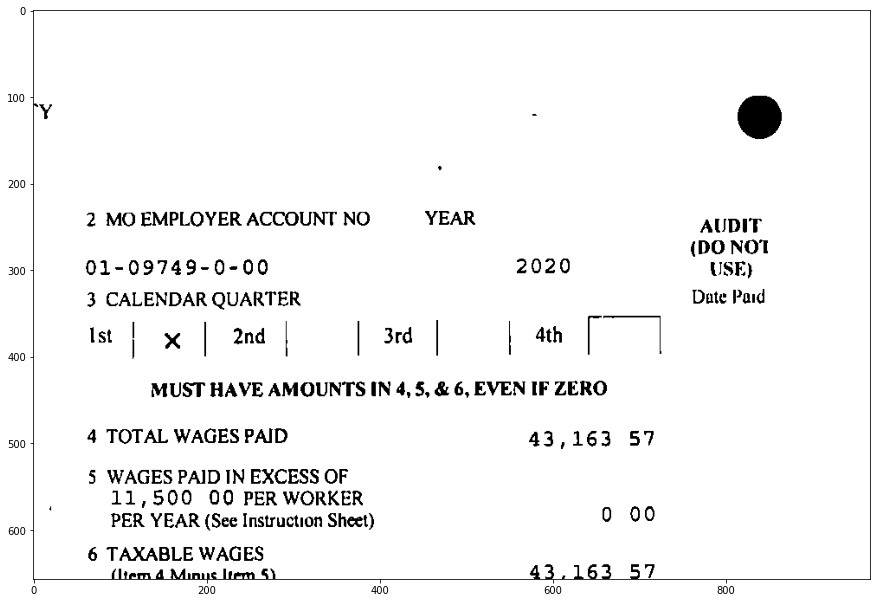

In [51]:
image = cv2.imread('/home/vimalkumar.s/Documents/file samples/100 files/test/samples/0109749000.tif')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
#plt.figure(figsize=(15,15))
#plt.imshow(result)

width = result.shape[1]
height = result.shape[0]
wi = width * 0.95
he = height * 0.3
w = int(wi)
h = int(he)
y = 0
x1 = w * 0.45
x = int(x1)
crop = result[y:y+h, x:x+w]
plt.figure(figsize=(15,15))
plt.imshow(crop)

im = crop.copy()

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
r_easy_ocr=reader.readtext(thresh,detail=0)
print(r_easy_ocr)

for i in r_easy_ocr:
        #print(i)
        if i == 'X' or i == 'x':
            #print(r_easy_ocr.index(i))
            c = r_easy_ocr.index(i)-1
            print(r_easy_ocr[c][0])

In [10]:
from PIL import Image
import os
path = '/home/vimalkumar.s/Documents/100 files/Bad doc'
for i in os.listdir(path):
    #print(i)
    #c = os.path.splitext(i)[0]
    #print(c)
    img = Image.open(os.path.join(path,i))
    img.seek(0)
    img.save(os.path.join('/home/vimalkumar.s/Documents/extraction/header/total wages paid/table-ocr_input',os.path.splitext(i)[0]+'.jpeg'))

In [13]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pandas
  
dict1 = {'name': ["aparna", "pankaj", 
                  "sudhir", "Geeku"]}
  
dict2 = {'name': ["aparn", "arup", "Pankaj",
                  "sudhir c", "Geek", "abc"]}
  

/home/vimalkumar.s/Documents/python_new/cde_venv/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [16]:
import pandas as pd
 
# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
# print dataframe.
df

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [31]:
word = 'nic'
for i in df['Name']:
    #print(i)
    print(fuzz.ratio(word,i))
    if fuzz.ratio(word,i) > 85:
        c = i
        print(c)
        df1 = df[df['Name'] == c]
        print(df1)
    

0
86
nick
   Name  Age
1  nick   15
29


In [44]:
word_1 = 'TOTAL WAGES PAID'
word_2 = 'TOTAL WAEiS PAiD'
fuzz.ratio(word_1,word_2)

88

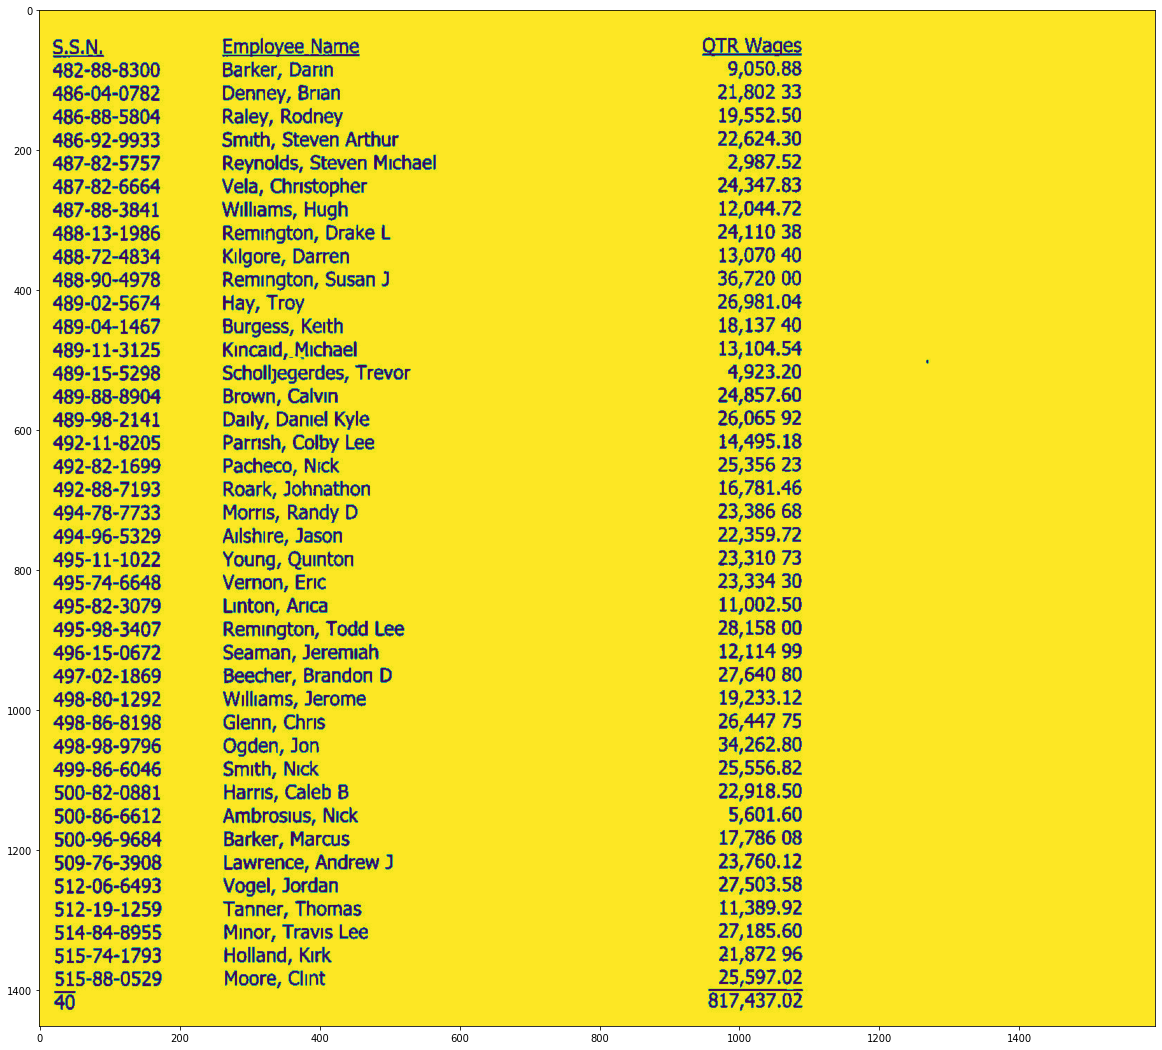

In [4]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
  
# Opens a image in RGB mode
im = Image.open(r"/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0641988000.jpeg")
#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /11.5
right = 1600
bottom = 3 * height / 4
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
im1.save('/home/vimalkumar.s/Documents/file samples/tt/0641988000_crop.jpeg')
# Shows the image in image viewer

In [ ]:
import cv2
import numpy as np 
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import statistics
from PIL import Image

plt.rcParams['figure.figsize'] = [15, 8]

img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04162020/0347682000.jpeg',0)
img.shape



#imgplot = plt.imshow(cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])
img123 = img1.copy()

(thresh, th3) = cv2.threshold(img1, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

th3 = 255-th3

#imgplot = plt.imshow(cv2.resize(th3, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

if(th3.shape[0]<1000):
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1]])
    
else:
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
    
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)


#imgplot = plt.imshow(cv2.resize(verticle_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()


# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)


#imgplot = plt.imshow(cv2.resize(hor_lines_img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = 255-hor_ver

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp = cv2.subtract(th3,hor_ver)

#imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp = 255-temp


#imgplot = plt.imshow(cv2.resize(temp, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

tt = cv2.bitwise_xor(img1,temp)

#imgplot = plt.imshow(cv2.resize(tt, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

iii = cv2.bitwise_not(tt)


#imgplot = plt.imshow(cv2.resize(iii, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

tt1=iii.copy()


#imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

#kernel initialization
ver1 = np.array([[1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1]])

hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1,1]])

temp1 = cv2.erode(tt1, ver1, iterations=1)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=1)

#imgplot = plt.imshow(cv2.resize(verticle_lines_img1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=1)

#imgplot = plt.imshow(cv2.resize(hor_lines_img2, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)

#imgplot = plt.imshow(cv2.resize(hor_ver, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

dim1 = (hor_ver.shape[1],hor_ver.shape[0])

dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

want = cv2.bitwise_not(resized)
#imgplot = plt.imshow(cv2.resize(want, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])
    
tt1 = cv2.dilate(want,kernel1,iterations=14)
#imgplot = plt.imshow(cv2.resize(tt1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
#plt.show()

resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])
    
heightlist.sort()

sportion = int(.5*len(heightlist))

eportion = int(0.05*len(heightlist))

#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])
    
box =[]
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.7*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    # to show image
    

imgplot = plt.imshow(cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC),cmap='gray')
plt.show()
#cv2.imwrite('imagegen.jpg',image)

main=[]
j=0
l=[]
for i in range(len(box)):    
    if(i==0):
        l.append(box[i])
        last=box[i]
    else:
        if(box[i][1]<=last[1]+medianheight/2):
            l.append(box[i])
            last=box[i]
            if(i==len(box)-1):
                main.append(l)
        else:
#             print(l)            
            main.append(l)
            l=[]
            last = box[i]
            l.append(box[i])
            
#calculating maximum number of box in a particular row
maxsize=0
for i in range(len(main)):
    l=len(main[i])
    if(maxsize<=l):
        maxsize=l
        
ylist=[]
for i in range(len(boundingBoxes)):
    ylist.append(boundingBoxes[i][0])
    
ymax = max(ylist)
ymin = min(ylist)

ymaxwidth=0
for i in range(len(boundingBoxes)):
    if(boundingBoxes[i][0]==ymax):
        ymaxwidth=boundingBoxes[i][2]
        
TotWidth = ymax+ymaxwidth-ymin

width = []
widthsum=0
for i in range(len(main)):
    for j in range(len(main[i])):
        widthsum = main[i][j][2]+widthsum
    
#     print(" Row ",i,"total width",widthsum)
    width.append(widthsum)
    widthsum=0
    
main1=[]
flag=0
for i in range(len(main)):
    if(i==0):
        if(width[i]>=(.8*TotWidth) and len(main[i])==1 or width[i]>=(.8*TotWidth) and width[i+1]>=(.8*TotWidth) or len(main[i])==1):
            flag = 1
    else:
        if(len(main[i])==1 and width[i-1]>=.8*TotWidth):
            flag=1
           
        elif(width[i]>=(.8*TotWidth) and len(main[i])==1):
             flag=1
             
        elif(len(main[i-1])==1 and len(main[i])==1 and (width[i]>=(.7*TotWidth) or width[i-1]>=(.8*TotWidth))):
            flag=1
    
        
    if(flag==1):
        pass
    else:
        main1.append(main[i])
    
    flag=0
    
maxsize1=0
for i in range(len(main1)):
    l=len(main1[i])
    if(maxsize1<=l):
        maxsize1=l
    
midpoint=[]
for i in range(len(main1)):
    if(len(main1[i])==maxsize1):
#         print(main1[i])
        for j in range(maxsize1):
            midpoint.append(int(main1[i][j][0]+main1[i][j][2]/2))
        break
        
midpoint=np.array(midpoint)
midpoint.sort()

final = [[]*maxsize1]*len(main1)

for i in range(len(main1)):
    for j in range(len(main1[i])):
        min_idx = j        
        for k in range(j+1,len(main1[i])):
            if(main1[i][min_idx][0]>main1[i][k][0]):
                min_idx = k
        
        main1[i][j], main1[i][min_idx] = main1[i][min_idx],main1[i][j]
        
finallist = []
for i in range(len(main1)):
    lis=[ [] for k in range(maxsize1)]
    for j in range(len(main1[i])):
#         diff=np.zeros[maxsize]
        diff = abs(midpoint-(main1[i][j][0]+main1[i][j][2]/4))
        minvalue = min(diff)
        ind = list(diff).index(minvalue)
#         print(minvalue)
        lis[ind].append(main1[i][j])
#     print('----------------------------------------------')
    finallist.append(lis)
    
todump=[]
for i in range(len(finallist)):
    for j in range(len(finallist[i])):
        to_out=''
        if(len(finallist[i][j])==0):
            #print('-')
            todump.append(' ')
        
        else:
            for k in range(len(finallist[i][j])):                
                y,x,w,h = finallist[i][j][k][0],finallist[i][j][k][1],finallist[i][j][k][2],finallist[i][j][k][3]

                roi = iii[x:x+h, y+2:y+w]
                roi1= cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255])
                img = cv2.resize(roi1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                kernel = np.ones((2, 1), np.uint8)
                img = cv2.dilate(img, kernel, iterations=1)
                img = cv2.erode(img, kernel, iterations=2)
                img = cv2.dilate(img, kernel, iterations=1)
                
                

                out = pytesseract.image_to_string(img)
                if(len(out)==0):
                    out = pytesseract.image_to_string(img,config='-psm 10')
                
                to_out = to_out +" "+out
                
            #print(to_out)
                
            todump.append(to_out)
#             cv2.imshow('image',img)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
    

            
            
           
    #print("--------------------------------------------------")
    
npdump = np.array(todump)

dataframe = pd.DataFrame(npdump.reshape(len(main1),maxsize1))

dataframe
